# 🛒 Amazon Product Co-Purchasing Network Analysis

**STAGE 7 PROJECT**

**Importation of Libaries**

In [27]:
%pip install networkx matplotlib pandas


In [ ]:
import pandas as pd

In [2]:
import networkx as nx

In [3]:
import matplotlib.pyplot as plt

# 1: Load & Explore the Dataset
In this step, I loaded the dataset into a NetworkX graph and explore its basic properties, 
such as the number of nodes and edges.


In [4]:
#Loading the datasets needed for my analysis - Amazon co-purcharsing network dataset
file = r"C:\Users\Chika\Downloads\com-amazon.ungraph.txt"


In [5]:
#Checking to ensure file loaded properly
with open(file, "r") as f:
    for _ in range(10):  # Print first 10 lines
        print(f.readline().strip())


# Undirected graph: ../../data/output/amazon.ungraph.txt
# Amazon
# Nodes: 334863 Edges: 925872
# FromNodeId	ToNodeId
1	88160
1	118052
1	161555
1	244916
1	346495
1	444232


In [6]:
# Load Graph while ignoring lines (#) and automatically detecting spaces /tabs separators
G = nx.read_edgelist(file, comments='#', delimiter=None, nodetype=int)

In [7]:
# Checking if Graph Loaded Correctly 
print(f"Nodes: {len(G.nodes())}, Edges: {len(G.edges())}")

Nodes: 334863, Edges: 925872


In [8]:
# Check for self-loops (i.e products linking to themselves)
self_loops = list(nx.selfloop_edges(G))
print(f"Number of self-loops: {len(self_loops)}")

# Check for isolated nodes (products that have no links at all)
isolated_nodes = list(nx.isolates(G))
print(f"Number of isolated nodes: {len(isolated_nodes)}")


Number of self-loops: 0
Number of isolated nodes: 0


### 2. Extra Network Insights
Before I proceed to answering my research question, I will analyze key network properties 
to get a deeper understanding of product relationships.

In [9]:
# Measuring how interconnected the product network is using Graph Density
# Low density means most products are not frequently co-purchased together.
# This insight can help Shopdesk users understand which products should be bundled
# or stocked together based on real-world buying behavior.

density = nx.density(G)
print(f"Graph Density: {density:.6f}")


Graph Density: 0.000017


In [10]:
# Identifying Highly Connected Products called Hubs
# These are the products that appear most frequently in co-purchases.
# ShopDesk users can leverage this to identify top-selling products 
# and ensure these key items are always in stock.

# Get the degree (number of connections) of each product
degree_dict = dict(G.degree())

# Sort products by highest connections (hub products)
top_hubs = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the top 10 most connected products
print("Top 10 Hub Products (Most Co-Purchased):")
for product, connections in top_hubs:
    print(f"Product Node ID: {product}, Co-purchase connections: {connections}")

Top 10 Hub Products (Most Co-Purchased):
Product Node ID: 548091, Co-purchase connections: 549
Product Node ID: 458358, Co-purchase connections: 324
Product Node ID: 222074, Co-purchase connections: 257
Product Node ID: 199628, Co-purchase connections: 230
Product Node ID: 515301, Co-purchase connections: 228
Product Node ID: 291117, Co-purchase connections: 219
Product Node ID: 502784, Co-purchase connections: 217
Product Node ID: 296016, Co-purchase connections: 212
Product Node ID: 239107, Co-purchase connections: 205
Product Node ID: 436020, Co-purchase connections: 197


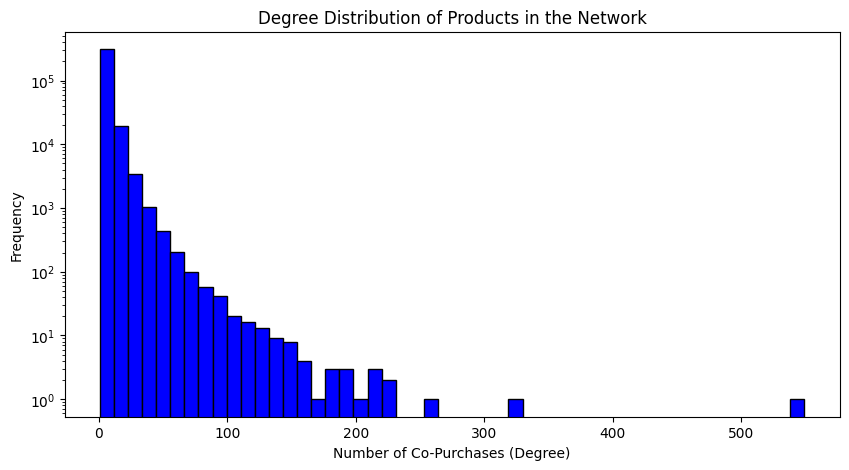

In [11]:
#Checking for degree of distribution to enable users understand the connections 
#that exist between products and understanding their purchasing habit
#'Helps us see if most products are bought randomly or if few products dominate'

# Extract degree values
degree_values = list(degree_dict.values())

#Plot Degree Distribution
plt.figure(figsize=(10, 5))
plt.hist(degree_values, bins=50, color="blue", edgecolor="black", log=True)  # Log scale for better visualization
plt.xlabel("Number of Co-Purchases (Degree)")
plt.ylabel("Frequency")
plt.title("Degree Distribution of Products in the Network")
plt.show()


### 3. Computing Network Metrics for Research Questions

**Question 1: What is the Average Clustering Coefficient of the Network?**

In [12]:
# This measures how tightly connected the products are in small groups.
# If a product has high value, it means customers tend to buy the same sets of products together.

# Calculate clustering coefficients for each node
clustering_coefficients = nx.clustering(G)

# Convert to list for visualization
clustering_values = list(clustering_coefficients.values())

# Print the average clustering coefficient
average_clustering = sum(clustering_values) / len(clustering_values)
print(f"Average Clustering Coefficient: {average_clustering:.4f}")


Average Clustering Coefficient: 0.3967


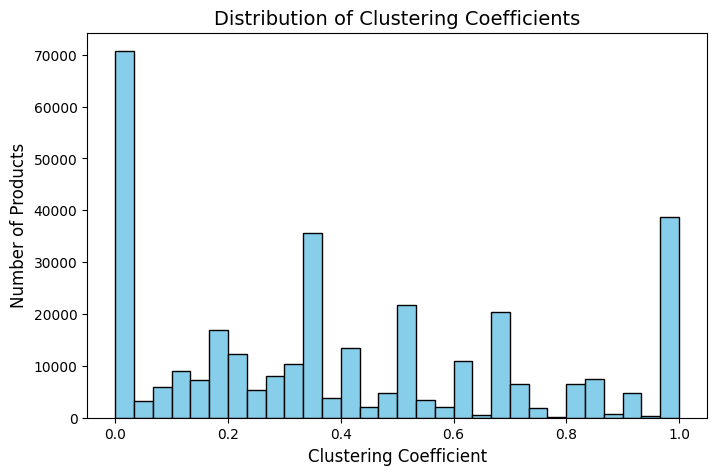

In [13]:
#Visualising the distribution of clustering coefficient values

plt.figure(figsize=(8, 5))
plt.hist(clustering_values, bins=30, color='skyblue', edgecolor='black')

# Titles and labels
plt.title("Distribution of Clustering Coefficients", fontsize=14)
plt.xlabel("Clustering Coefficient", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)

# Show the plot
plt.show()

**Question 2: Which products have the highest influence in the co-purchase network?**


Top 10 Most Influential Product Nodes in the Co-Purchase Network:
Product Node ID 548091: Eigenvector Centrality Score = 0.532497
Product Node ID 436020: Eigenvector Centrality Score = 0.256157
Product Node ID 424153: Eigenvector Centrality Score = 0.166300
Product Node ID 7308: Eigenvector Centrality Score = 0.157044
Product Node ID 410716: Eigenvector Centrality Score = 0.153670
Product Node ID 27832: Eigenvector Centrality Score = 0.139729
Product Node ID 503706: Eigenvector Centrality Score = 0.128326
Product Node ID 463355: Eigenvector Centrality Score = 0.126795
Product Node ID 398826: Eigenvector Centrality Score = 0.106906
Product Node ID 515301: Eigenvector Centrality Score = 0.078834


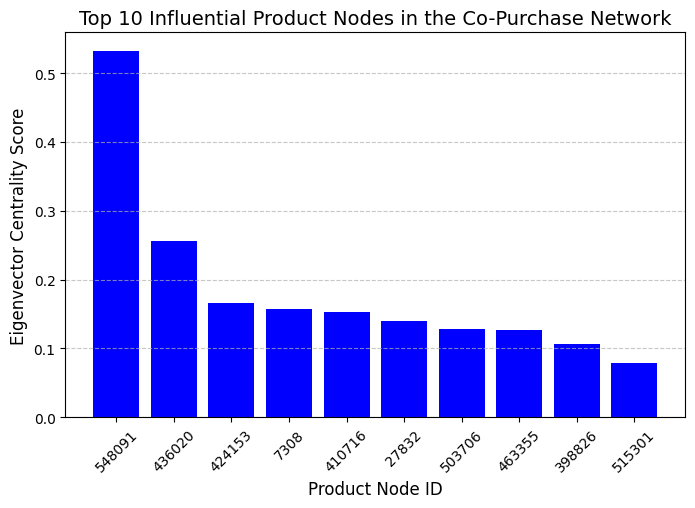

In [14]:
# Identifies key influencer products that drive purchases across categories.
# Businesses can prioritize these products in recommendations and promotions.

# Compute Eigenvector Centrality to find the most influential product nodes
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Sort nodes by highest centrality score
top_influential_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Print Results with Correct Terminology
print("\nTop 10 Most Influential Product Nodes in the Co-Purchase Network:")
for node, score in top_influential_nodes:
    print(f"Product Node ID {node}: Eigenvector Centrality Score = {score:.6f}")

# Visualization: Bar Chart for Top Influential Product Nodes
nodes, influence_scores = zip(*top_influential_nodes)

plt.figure(figsize=(8, 5))

# Convert node IDs to strings to ensure they display correctly on the x-axis
plt.bar([str(node) for node in nodes], influence_scores, color='Blue')

plt.title("Top 10 Influential Product Nodes in the Co-Purchase Network", fontsize=14)
plt.xlabel("Product Node ID", fontsize=12)
plt.ylabel("Eigenvector Centrality Score", fontsize=12)

plt.xticks(rotation=45)  # Rotate for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Question 3:How many communities exist within the co-purchase network?**

In [ ]:
%pip install python-louvain


In [16]:
import community

# Detect Communities Using the Louvain Method

partition = community.best_partition(G)  # Detecting communities
num_communities = len(set(partition.values()))  # Count unique communities

print(f"Number of detected communities: {num_communities}")


Number of detected communities: 241


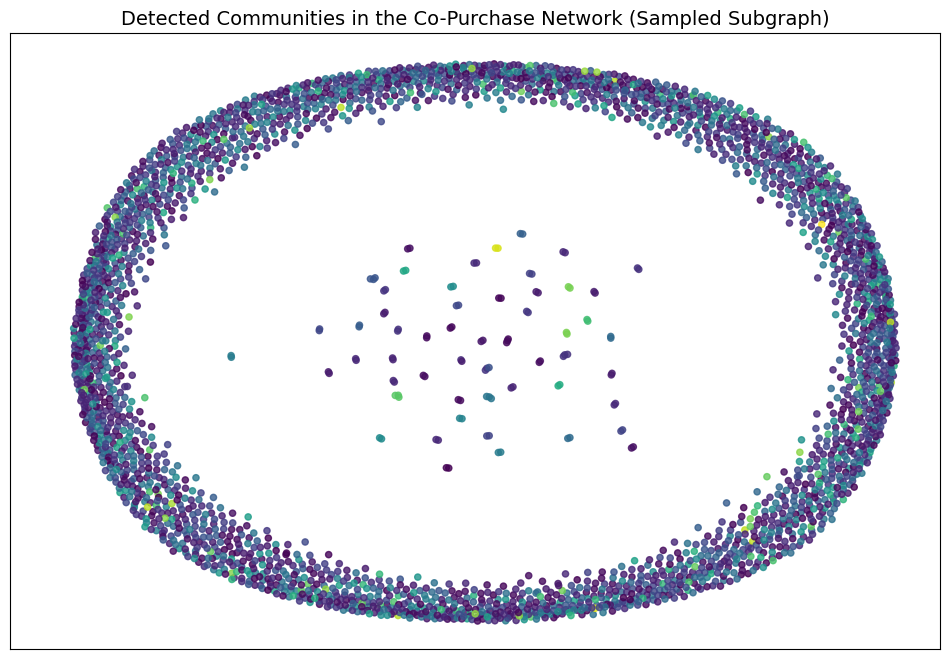

In [17]:
import random
import numpy as np

# Sample a subset of the graph for better visualization
sample_size = 3000  
sampled_nodes = random.sample(list(G.nodes()), sample_size)
G_sampled = G.subgraph(sampled_nodes)

# Assign colors to nodes in the sampled graph
sampled_node_colors = np.array([partition[node] for node in G_sampled.nodes()])

# Draw the sampled network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_sampled, seed=42)  # Position nodes using force-directed layout
nx.draw_networkx_nodes(G_sampled, pos, node_size=20, cmap=plt.cm.viridis, node_color=sampled_node_colors, alpha=0.8)
nx.draw_networkx_edges(G_sampled, pos, alpha=0.2, width=0.2)

plt.title("Detected Communities in the Co-Purchase Network (Sampled Subgraph)", fontsize=14)
plt.show()


**Showing next a histogram of the community sizes for quantitative perspective**

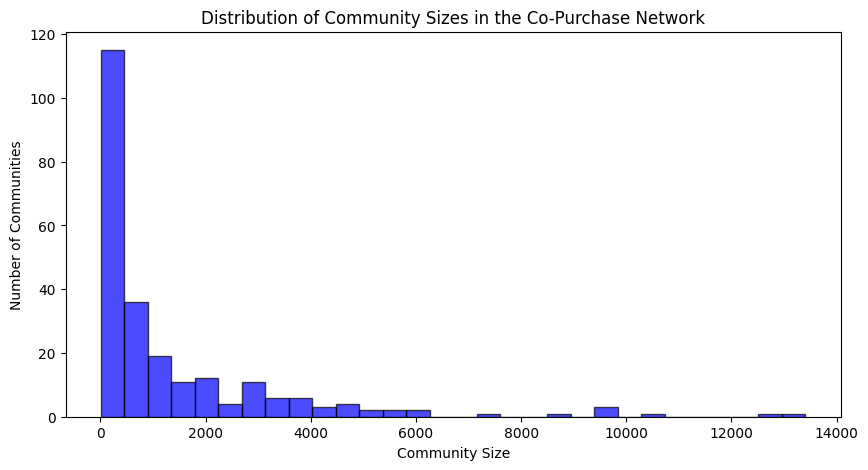

In [18]:
from collections import Counter

# Count how many nodes belong to each community
community_sizes = Counter(partition.values())

# Plot the histogram of community sizes
plt.figure(figsize=(10, 5))
plt.hist(community_sizes.values(), bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Community Size")
plt.ylabel("Number of Communities")
plt.title("Distribution of Community Sizes in the Co-Purchase Network")
plt.show()


**Question 4: Are certain communities more self-contained, with fewer external links?**


In [19]:
#computing community modularity

import community as community_louvain

# Compute Louvain community detection
partition = community_louvain.best_partition(G)

# Compute modularity score
modularity = nx.algorithms.community.quality.modularity(G, [{node for node in partition if partition[node] == comm} for comm in set(partition.values())])

print(f"Modularity Score of the Network: {modularity:.4f}")


Modularity Score of the Network: 0.9263


In [20]:
#identifying the most self-contained communities
from collections import Counter

# Count external connections for each community
external_links = {comm: 0 for comm in set(partition.values())}

for node1, node2 in G.edges():
    if partition[node1] != partition[node2]:  # If nodes belong to different communities
        external_links[partition[node1]] += 1
        external_links[partition[node2]] += 1

# Sort communities by lowest external links (most self-contained)
self_contained_communities = sorted(external_links.items(), key=lambda x: x[1])

print("\nTop 10 Most Self-Contained Communities (Fewest External Links):")
for community_id, ext_links in self_contained_communities[:10]:
    print(f"Community {community_id}: {ext_links} external links")



Top 10 Most Self-Contained Communities (Fewest External Links):
Community 3: 1 external links
Community 38: 1 external links
Community 45: 1 external links
Community 62: 1 external links
Community 70: 1 external links
Community 79: 1 external links
Community 98: 1 external links
Community 99: 1 external links
Community 102: 1 external links
Community 121: 1 external links


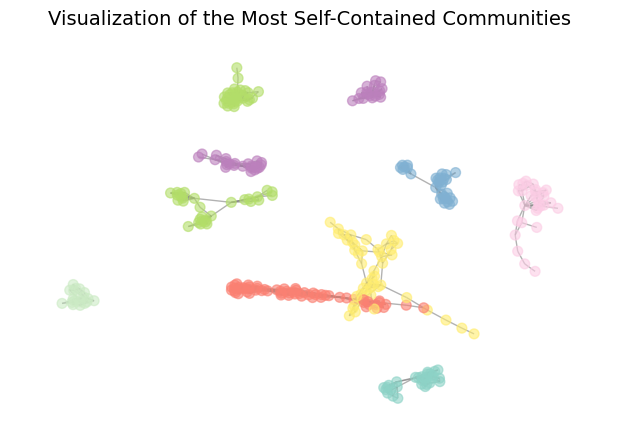

In [21]:
#visualising the outputs 


# Extract the top 10 self-contained communities (with the fewest external links)
top_self_contained = [comm for comm, _ in self_contained_communities[:10]]

# Create a subgraph containing only nodes from these communities
nodes_in_top_communities = [node for node in partition if partition[node] in top_self_contained]
G_self_contained = G.subgraph(nodes_in_top_communities)

# Assign colors to nodes based on their community
node_colors = [partition[node] for node in G_self_contained.nodes()]

# Plot the self-contained communities using a force-directed layout
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G_self_contained, seed=42)  # Spring layout for better spacing

nx.draw(G_self_contained, pos, 
        node_size=50, 
        node_color=node_colors, 
        cmap=plt.cm.Set3, 
        edge_color="gray", 
        alpha=0.6, 
        with_labels=False)

plt.title("Visualization of the Most Self-Contained Communities", fontsize=14)
plt.show()


**Question 5: Which products frequently act as ‘bridges’ between different communities?**
This is to help businesses identify products that connect multiple communities in the co-purchase network.
These products are key for cross-category promotions and strategic marketing efforts.


 Top 10 Bridge Products Connecting Different Communities:
Product Node ID 502784
Product Node ID 442851
Product Node ID 7099
Product Node ID 154855
Product Node ID 89000
Product Node ID 360679
Product Node ID 378443
Product Node ID 329708
Product Node ID 265965
Product Node ID 278001
Product Node ID 104920
Product Node ID 472123
Product Node ID 302460
Product Node ID 227325


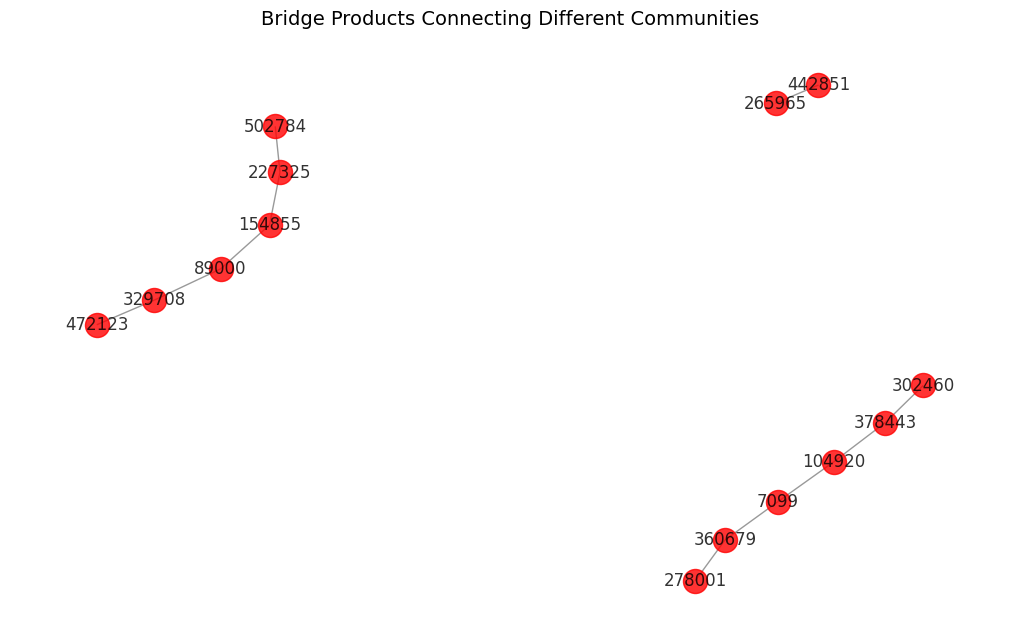

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

#  Optimize Edge Betweenness Calculation
edge_betweenness = nx.edge_betweenness_centrality(G, k=100)  # Lower k for faster execution

# Get the top edges with highest betweenness
top_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract the nodes involved in these edges
top_bridge_products = set()
for (node1, node2), _ in top_edges:
    top_bridge_products.add(node1)
    top_bridge_products.add(node2)

# Print results
print("\n Top 10 Bridge Products Connecting Different Communities:")
for product_node in top_bridge_products:
    print(f"Product Node ID {product_node}")

#  Faster Visualization of Bridge Products
plt.figure(figsize=(10, 6))
subG = G.subgraph(top_bridge_products)
pos = nx.spring_layout(subG, seed=42)  # Fix layout for readability
nx.draw(subG, pos, with_labels=True, node_color="red", edge_color="gray", alpha=0.8)
plt.title("Bridge Products Connecting Different Communities", fontsize=14)
plt.show()


In [ ]:
%pip install plotly

In [24]:

import plotly.graph_objects as go
import pandas as pd


# Step 4: Assign nodes to communities
partition = nx.community.louvain_communities(G)  # Detect communities

# Create a mapping of nodes to their community
node_to_community = {}
for i, comm in enumerate(partition):
    for node in comm:
        node_to_community[node] = f"Community {i+1}"

# Step 5: Prepare data for Sankey Diagram
bridge_data = []
for (node1, node2), _ in top_edges:
    if node1 in node_to_community and node2 in node_to_community:
        bridge_data.append((node_to_community[node1], node_to_community[node2]))

# Convert to DataFrame
df = pd.DataFrame(bridge_data, columns=["Source", "Target"])
df["Weight"] = 1  # Assign weight to edges for visualization

# Step 6: Prepare Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        label=list(set(df["Source"].tolist() + df["Target"].tolist())),  # Unique communities
        color=["rgba(100, 149, 237, 0.7)" for _ in range(len(set(df["Source"].tolist() + df["Target"].tolist())))]
    ),
    link=dict(
        source=[list(set(df["Source"].tolist() + df["Target"].tolist())).index(src) for src in df["Source"]],
        target=[list(set(df["Source"].tolist() + df["Target"].tolist())).index(tgt) for tgt in df["Target"]],
        value=df["Weight"]
    )
))

fig.update_layout(title_text="Bridge Products Connecting Different Communities", font_size=10)
fig.show()


**Question 6:  Which product pairs have the strongest co-purchase relationships?**

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# Identify the strongest co-purchase relationships (top 10 strongest edges)
top_edges = sorted(G.edges(data=True), key=lambda x: x[2].get('weight', 1), reverse=True)[:10]

# Extract product node pairs and weights
strong_product_pairs = [(u, v, d.get('weight', 1)) for u, v, d in top_edges]

# Print the top 10 strongest co-purchase relationships
print("\nTop 10 Strongest Co-Purchase Relationships:")
for i, (product1, product2, weight) in enumerate(strong_product_pairs):
    print(f"{i+1}. Product Node {product1} ↔ Product Node {product2} (Weight: {weight})")



Top 10 Strongest Co-Purchase Relationships:
1. Product Node 1 ↔ Product Node 88160 (Weight: 1)
2. Product Node 1 ↔ Product Node 118052 (Weight: 1)
3. Product Node 1 ↔ Product Node 161555 (Weight: 1)
4. Product Node 1 ↔ Product Node 244916 (Weight: 1)
5. Product Node 1 ↔ Product Node 346495 (Weight: 1)
6. Product Node 1 ↔ Product Node 444232 (Weight: 1)
7. Product Node 1 ↔ Product Node 447165 (Weight: 1)
8. Product Node 1 ↔ Product Node 500600 (Weight: 1)
9. Product Node 88160 ↔ Product Node 48724 (Weight: 1)
10. Product Node 88160 ↔ Product Node 102091 (Weight: 1)


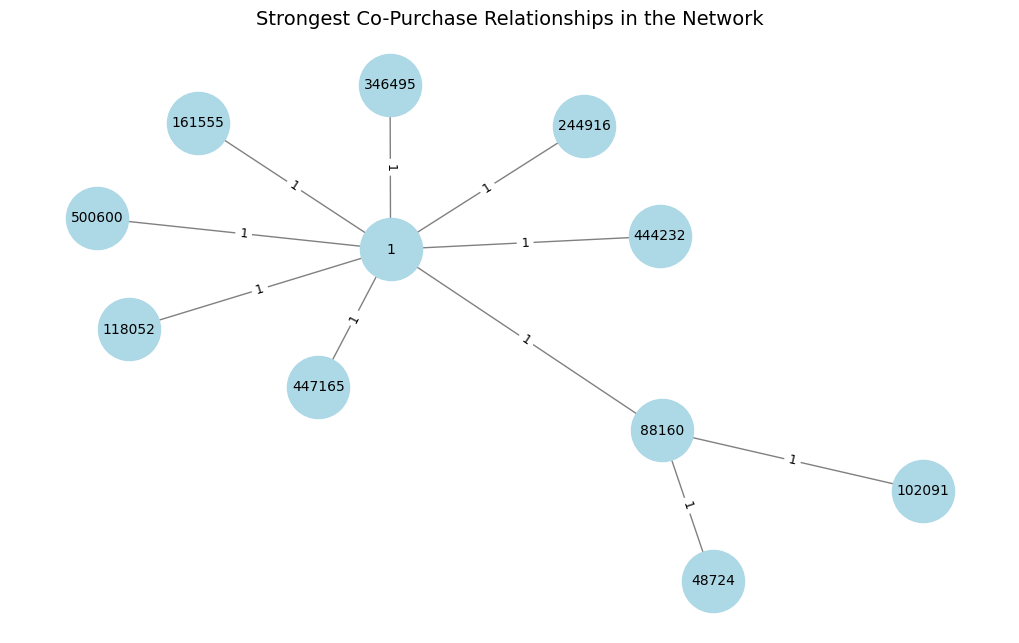

In [26]:
# Create a subgraph with the top 10 strongest relationships
G_strong = nx.Graph()
G_strong.add_weighted_edges_from(strong_product_pairs)

# Force-directed layout for clear visualization
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G_strong, seed=42)  # Fix seed for consistent layout

# Draw nodes and edges with edge weights
nx.draw(G_strong, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G_strong.edges(data=True)}
nx.draw_networkx_edge_labels(G_strong, pos, edge_labels=edge_labels, font_size=9)

# Title
plt.title("Strongest Co-Purchase Relationships in the Network", fontsize=14)
plt.show()
